In [2]:
# 라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# data load
df = pd.read_csv('./dataset/global_tech_salary.txt', delimiter=',')

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


In [10]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2023.136400,1.588089e+05,148924.465200,32.800000
std,0.696198,2.072854e+05,66986.391667,46.492928
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.019408e+05,100573.250000,0.000000
50%,2023.000000,1.420000e+05,140304.000000,0.000000
75%,2024.000000,1.870000e+05,185900.000000,100.000000
max,2024.000000,8.500000e+06,750000.000000,100.000000


In [9]:
# 문자형 데이터를 수치형으로 변환 (Label Encoding)
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 문자형 열을 수치형으로 변환 (수치형으로 변환할 열 리스트를 지정)
# 예시: 'JobTitle', 'Country', 'Company' 등의 문자형 열을 수치형으로 변환
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# 4. 수치형 열만 선택
numeric_df = df.select_dtypes(include=['number'])  # 숫자형 열만 선택

# 5. 상관 관계 계산
corr_matrix = numeric_df.corr()


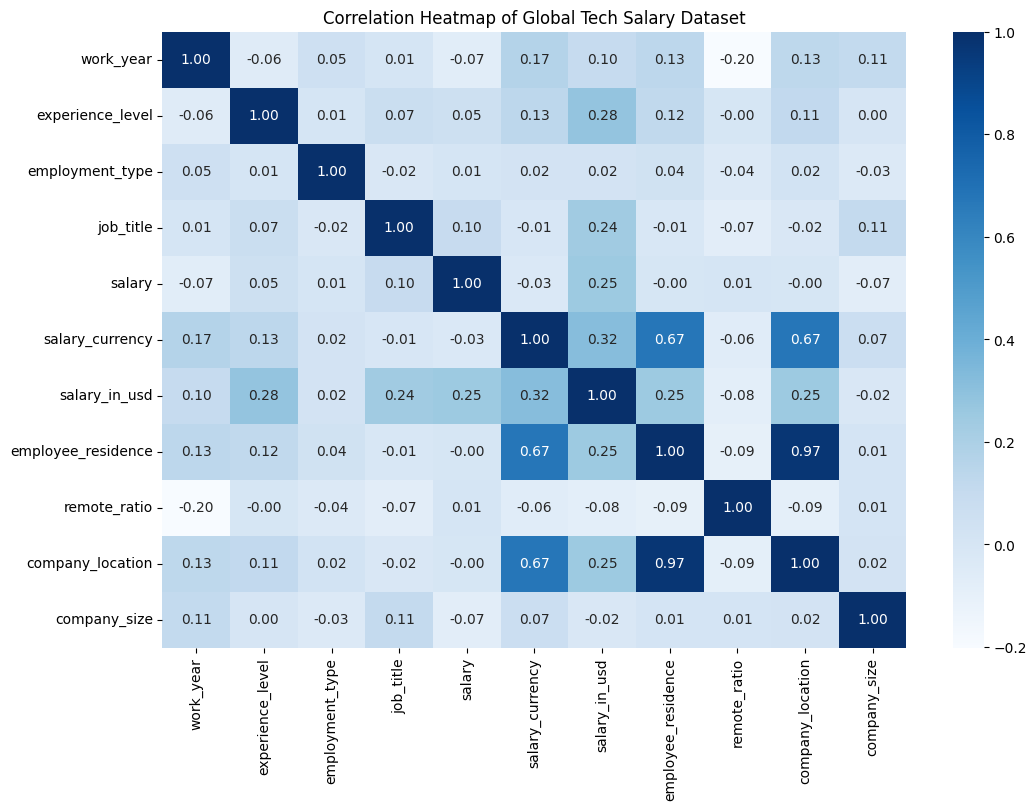

In [10]:
plt.figure(figsize=(12, 8))  # 히트맵 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')  # 상관 관계 행렬을 히트맵으로 시각화
plt.title("Correlation Heatmap of Global Tech Salary Dataset")  # 타이틀 추가
plt.show()

### LinearRegression

In [11]:
# 목표 변수와 설명 변수 분리
X = df.drop(columns=['salary'])
y = df['salary']

In [12]:
# 데이터셋 분할 (훈련 세트 80%, 테스트 세트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 선형 회귀 모델 초기화
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# 예측
y_pred = model.predict(X_test)

In [15]:
# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")  # MSE 값이 낮을 수록 좋은 모델
print(f"R-squared: {r2}") # R-squared (R²) : 1에 가까울 수록 좋은 모델

Mean Squared Error: 112952575697.01553
R-squared: 0.033414865880865285


### 로지스틱 회귀

In [18]:
X = numeric_df.iloc[:,:-1].values
y = numeric_df.iloc[:, -1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train) # 훈련

c:\AI_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()